# MNIST Example Project

In [1]:
# Pydata stack
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = (20, 10)

# Misc
from random import randint

from sklearn.base import BaseEstimator

# scikit-learn
from sklearn.datasets import fetch_openml  # For open source ML sets
from sklearn.ensemble import RandomForestClassifier

# Models
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import (
    confusion_matrix,
    f1_score,
    precision_recall_curve,
    precision_score,
    recall_score,
    roc_auc_score,
    roc_curve,
)
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

### Import Data

Begin by importing the data.

In [2]:
mnist = fetch_openml("mnist_784", version=1)  # Output is a dictionary

# Load data into dataframes (in textbook they are arrays)
X, y = mnist["data"], mnist["target"]

# Print description
mnist["details"]

{'id': '554',
 'name': 'mnist_784',
 'version': '1',
 'format': 'ARFF',
 'creator': ['Yann LeCun', 'Corinna Cortes', 'Christopher J.C. Burges'],
 'upload_date': '2014-09-29T03:28:38',
 'language': 'English',
 'licence': 'Public',
 'url': 'https://www.openml.org/data/v1/download/52667/mnist_784.arff',
 'file_id': '52667',
 'default_target_attribute': 'class',
 'tag': ['AzurePilot',
  'OpenML-CC18',
  'OpenML100',
  'study_1',
  'study_123',
  'study_41',
  'study_99',
  'vision'],
 'visibility': 'public',
 'minio_url': 'http://openml1.win.tue.nl/dataset554/dataset_554.pq',
 'status': 'active',
 'processing_date': '2020-11-20 20:12:09',
 'md5_checksum': '0298d579eb1b86163de7723944c7e495'}

In [3]:
# Take a look at the data
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 784 entries, pixel1 to pixel784
dtypes: float64(784)
memory usage: 418.7 MB


In [5]:
X.describe()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,...,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.0,70000.0,70000.0,70000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.197414,0.099543,0.046629,0.016614,0.012957,0.001714,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.991206,4.256304,2.783732,1.561822,1.553796,0.320889,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.000000,0.0,0.0,0.0,0.0


Each feature is a pixel's intensity from 0 to 255. Since there are 784 of them, each is a 28 x 28 pixel image.

In [6]:
y.head()

0    5
1    0
2    4
3    1
4    9
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

Labels are strings, we want them to be numerical.

In [7]:
y = y.astype(int)

#### Viewing a Pixel

Display the image a random pixel

Digit label: 0


(-0.5, 27.5, 27.5, -0.5)

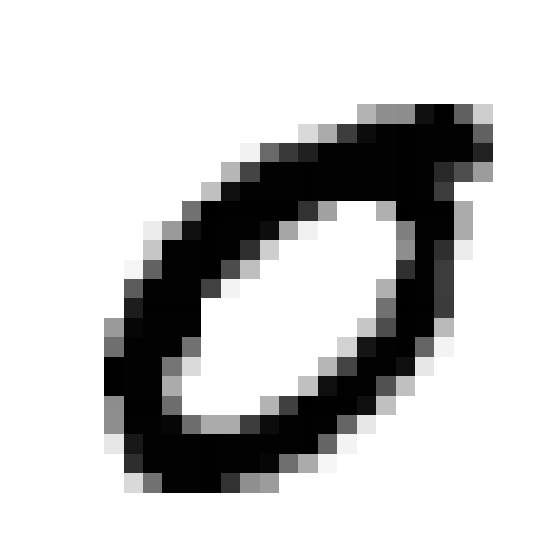

In [8]:
# Generate random index and print label
num_samples = 60000  # X.shape[0] # there are 6000 samples in training set
example_ix = randint(0, num_samples - 1)
print("Digit label: {}".format(y.iloc[example_ix]))

# Get pixel data and put in correct shape
example_digit = X.iloc[example_ix]
example_digit = example_digit.values  # Want underlying Numpy array
example_digit_image = example_digit.reshape(28, 28)

# Show image
plt.imshow(example_digit_image, cmap="binary")
plt.axis("off")

#### Test-Train Split

There is a pre-determined split in this set.

In [9]:
X_train, X_test, y_train, y_test = (
    X.iloc[:60000],
    X.iloc[60000:],
    y.iloc[:60000],
    y.iloc[60000:],
)

## Training a Binary Classifier

Create a Stochastic Gradient Descent classifier for the label 5.

In [10]:
# Create binary 5 / not-5 label set
y_train_5 = y_train == 5
y_test_5 = y_test == 5

In [11]:
# Train classifier
sgd_clf = SGDClassifier(random_state=42)  # For reproducible output
sgd_clf.fit(X_train, y_train_5)

ex_pred = sgd_clf.predict([X_train.iloc[0]])[0]
print("First sample: {}".format(y_train.iloc[0]))
print("Prediction whether first sample is 5: {}".format(ex_pred))

First sample: 5
Prediction whether first sample is 5: True


## Performance Measures

### Measuring Accuracy Using Cross-Validation

Cross-validation with 3 folds using accuracy as our measure.

In [12]:
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

Compare with custom estimator that always guesses not 5.

In [13]:
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        return self

    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)


never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

So guesses always not 5 has over 90% accuracy - this isn't a good metric because the dataset is skewed.

### Confusion Matrix

Generate predictions for each training sample using cross-validation (i.e. we split training set into 3 folds, and generate predictions by leaving folds out of training set one at a time).

In [14]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

Calculate precision and recall.

In [15]:
precision = precision_score(y_train_5, y_train_pred)
recall = recall_score(y_train_5, y_train_pred)

print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))

Precision: 0.84
Recall: 0.65


### Precision and Recall

In [16]:
f1 = f1_score(y_train_5, y_train_pred)

print("F1-Score: {:.2f}".format(f1))

F1-Score: 0.73


### Precision/Recall Trade-off

I want to get scores from the SGD Classifier's decision function, calculate precision and recall based on different decision thresholds and plot the results.

In [17]:
# get decision function scores
y_scores = cross_val_predict(
    sgd_clf, X_train, y_train_5, cv=3, method="decision_function"
)
precision, recall, thresholds = precision_recall_curve(y_train_5, y_scores)

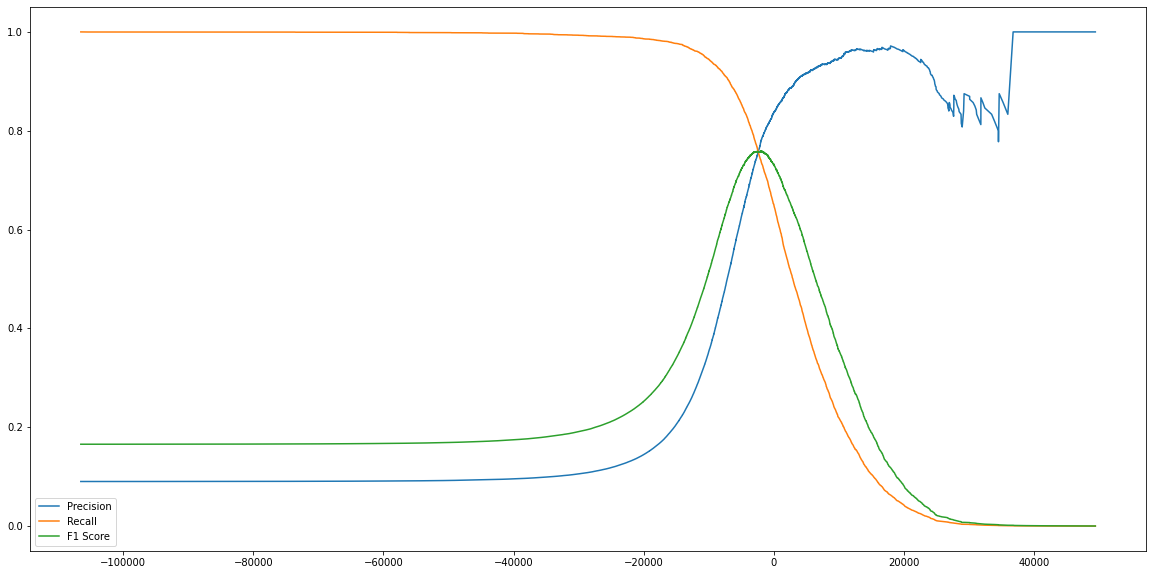

In [18]:
def plot_decision_function_scores(precision, recall, thresholds):
    fig, ax = plt.subplots()

    f1 = 2 * precision * recall / (precision + recall)

    ax.plot(thresholds, precision[:-1], label="Precision")
    ax.plot(thresholds, recall[:-1], label="Recall")
    ax.plot(thresholds, f1[:-1], label="F1 Score")

    ax.legend()


plot_decision_function_scores(precision, recall, thresholds)

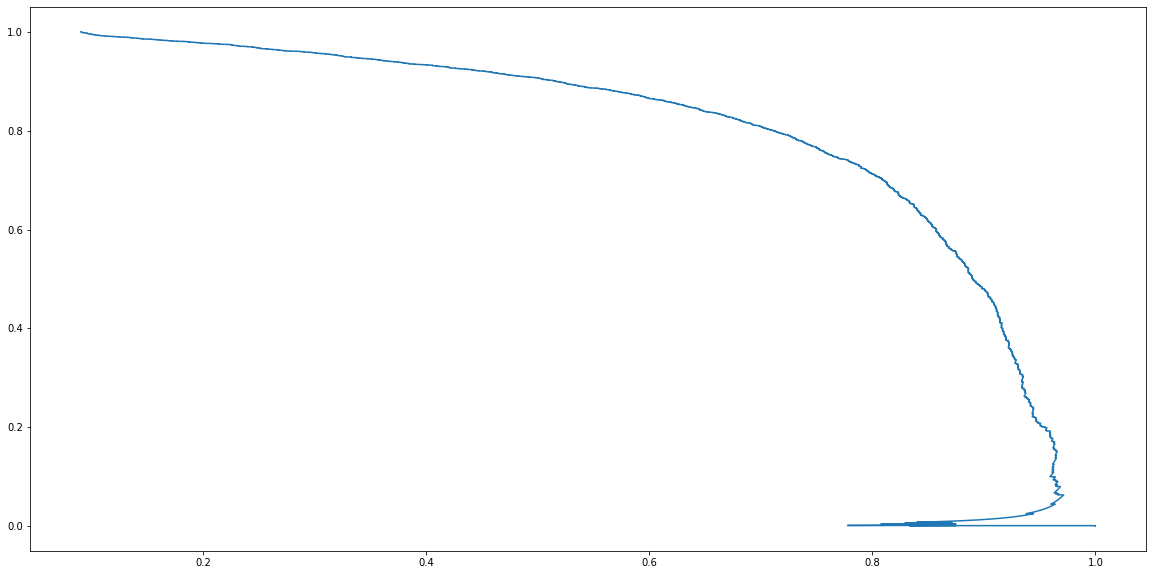

In [19]:
def plot_precision_against_recall(precision, recall):
    fig, ax = plt.subplots()

    ax.plot(precision, recall)


plot_precision_against_recall(precision, recall)

### The ROC Curve

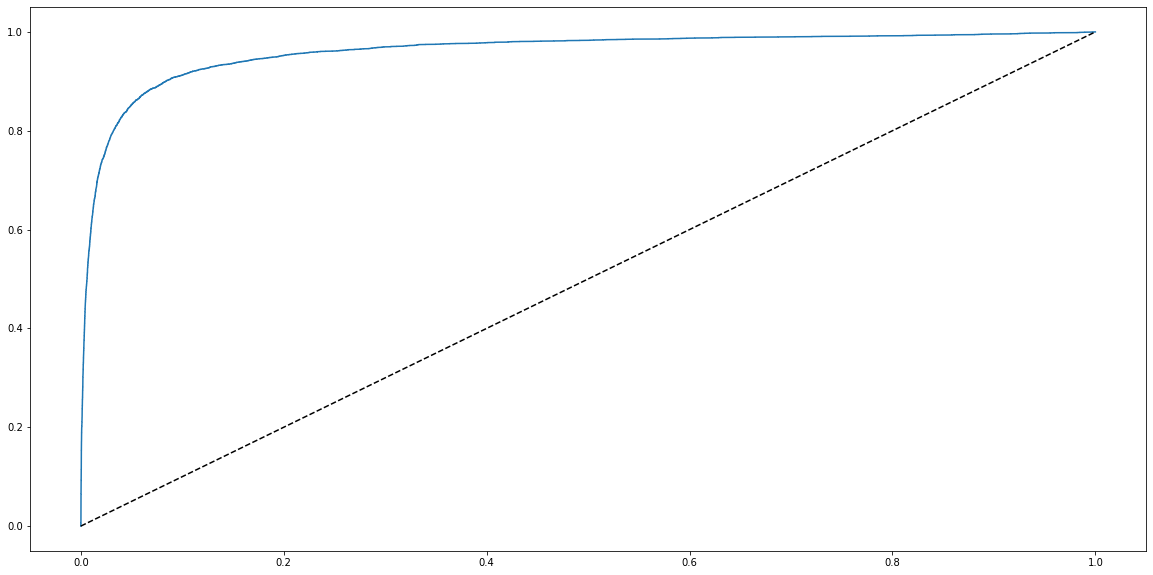

In [20]:
# plot ROC curve using false positive rate and true positive rate for various thresholds
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)


def plot_roc_curve(fpr, tpr, label=None):
    fig, ax = plt.subplots()

    # plot roc curve
    ax.plot(fpr, tpr, label=label)

    # plot random roc curve of random classifier
    x_val = np.linspace(0, 1, 50)
    ax.plot(x_val, x_val, ls="--", color="k")


plot_roc_curve(fpr, tpr)

In [21]:
# get auc score
auc = roc_auc_score(y_train_5, y_scores)
print("AUC Score: {:.2f}".format(auc))

AUC Score: 0.96


We compare against a random forest classifier

In [22]:
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(
    forest_clf, X_train, y_train_5, cv=3, method="predict_proba"
)

This has class probabilities rather than decision functions.

In [23]:
y_probas_forest

array([[0.11, 0.89],
       [0.99, 0.01],
       [0.96, 0.04],
       ...,
       [0.02, 0.98],
       [0.92, 0.08],
       [0.94, 0.06]])

In [24]:
y_probas_forest[example_ix, :]

array([0.9, 0.1])

So the example digit has a 99% chance of being 'not-5'.

The ROC curve can accept the class probability instead of the decision scores.

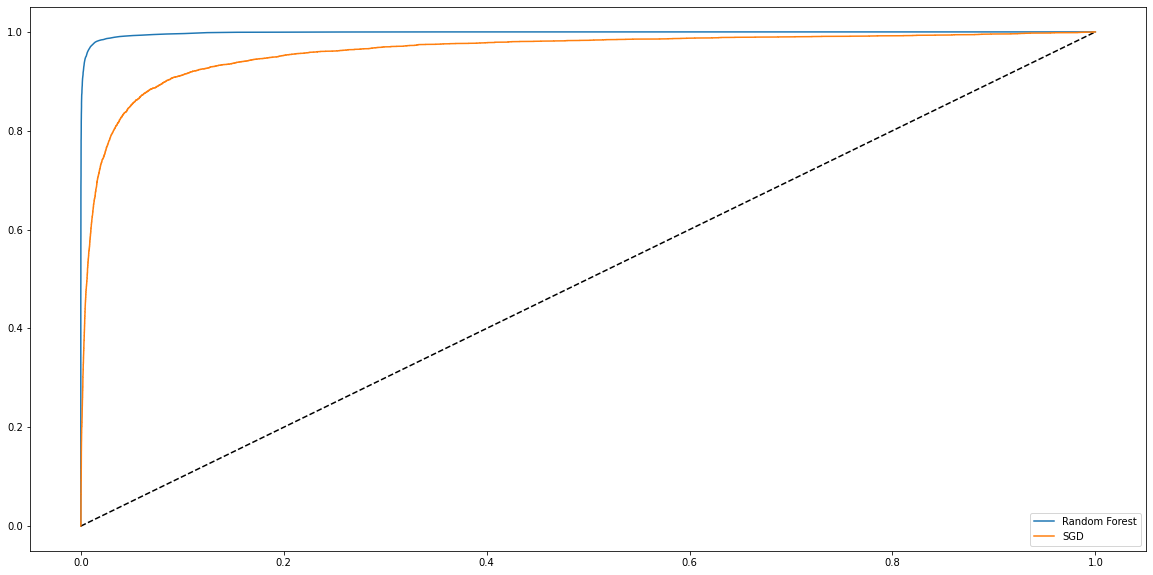

In [25]:
y_scores_forest = y_probas_forest[:, 1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

plot_roc_curve(fpr_forest, tpr_forest, label="Random Forest")
plt.plot(fpr, tpr, label="SGD")
plt.legend()

In [26]:
# get auc score
auc = roc_auc_score(y_train_5, y_scores_forest)
print("AUC Score: {:.2f}".format(auc))

AUC Score: 1.00


## Multiclass Classification

In [27]:
# SGD can handle multiclass natively
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([example_digit])

array([0])

In [28]:
# makes the classification based on decision function values for each class
sgd_clf.decision_function([example_digit])

array([[  2878.39410026, -60355.9152922 , -23169.42515492,
        -10711.39043655, -18200.78448762,  -4415.68638634,
        -64978.22152257, -20847.62651099,  -6477.45732646,
        -23081.63367672]])

In [29]:
# see classes in order
sgd_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [30]:
# evaluate using accuracy (classes are balanced so this is now a good metric)
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

In [31]:
# scaling inputs improves performance even more
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.8983, 0.891 , 0.9018])

Other classifiers (e.g. Support Vector Classifier) need to use OvR or OvO to perform mutliclass classification.

In [32]:
svm_clf = SVC(decision_function_shape="ovo")
svm_clf.fit(X_train, y_train)
svm_clf.predict([example_digit])

array([0])

This automatically uses OvO. We can see the individual binary classifiers by looking at the decision function

In [33]:
# note that we manually forced it to return all pairwise decisions using decision_function_shape
example_digit_scores = svm_clf.decision_function([example_digit])
example_digit_scores

array([[ 1.74987198,  2.11810322,  2.44224934,  1.68670496,  2.29786032,
         2.50627288,  1.66479452,  2.35286689,  1.93975899, -1.30620847,
        -1.45333377, -0.37368187, -2.33636688, -0.77761564, -0.44343888,
        -1.17680996, -0.81117714,  0.6223455 ,  0.22774985, -0.31244214,
         0.43971845,  0.42858892,  0.42623799, -0.14047471,  0.59544618,
        -1.61822688,  0.07551723,  0.42323952, -0.2376047 ,  0.16206083,
        -1.29351964,  0.21219088, -0.90288208, -1.07929423, -1.10371913,
         0.86207221,  0.94699574,  0.93392308,  1.37681534, -0.30016687,
        -0.35254914, -0.6226238 , -0.62955713,  0.47318341,  0.38018572]])

We can force it to use a OvR classifier instead

In [34]:
ovr_clf = OneVsRestClassifier(SVC())
ovr_clf.fit(X_train, y_train)

OneVsRestClassifier(estimator=SVC())

In [35]:
ovr_clf.predict([example_digit])

array([0])

## Error Analysis

Use confusion matrix to identify errors and analyse performance.

In [36]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]])

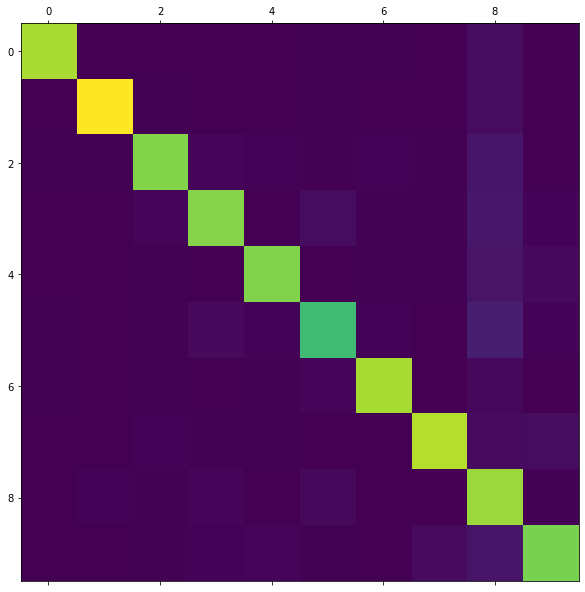

In [37]:
# plot confusion matrix
plt.matshow(conf_mx);

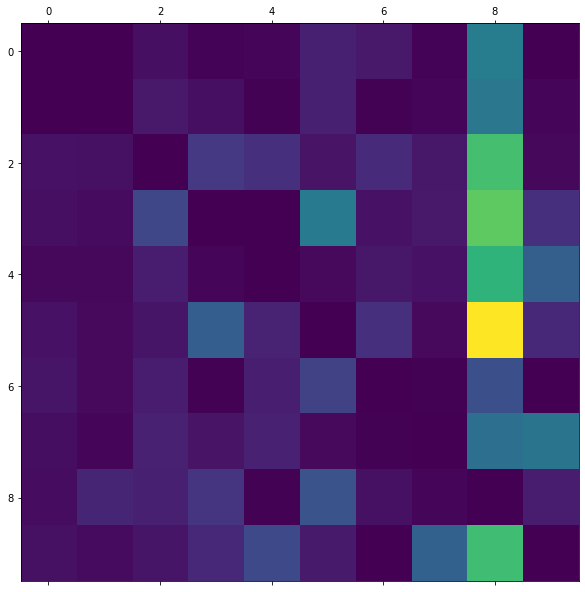

In [38]:
# normalise to get error rates and remove diagonals
row_sums = conf_mx.sum(axis=1)
norm_conf_mx = conf_mx / row_sums

np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx);

## Multilabel Classification

Artificially create some new labels - both or neither can be true - and train K-Nearest Neighbours classifier.

In [39]:
y_train_large = y_train >= 7
y_train_odd = y_train % 2 == 1
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

knn_clf.predict([example_digit])

array([[False, False]])

We can evaluate by calculating individual metrics and averaging them

In [40]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average="weighted") # weighted average

0.9778357403921755